In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('/content/Nifty_200_scripts.csv')
df.head()
df.shape


(728197, 7)

In [5]:
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728197 entries, 0 to 728196
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    728197 non-null  object 
 1   Open    728197 non-null  float64
 2   High    728197 non-null  float64
 3   Low     728197 non-null  float64
 4   Close   728197 non-null  float64
 5   Volume  728197 non-null  int64  
 6   Symbol  728197 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 38.9+ MB


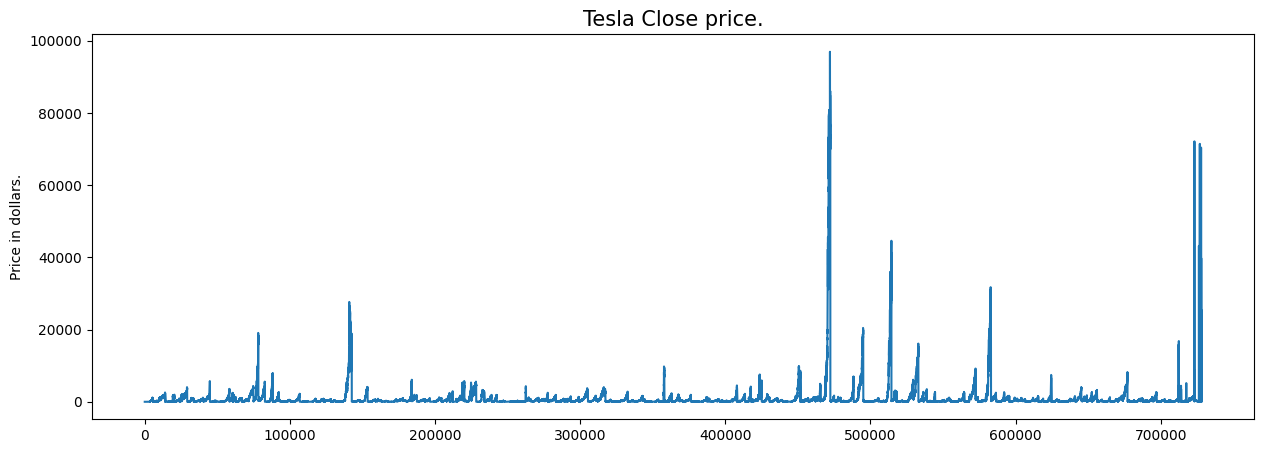

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [7]:
df.head()



,Date,Open,High,Low,Close,Volume,Symbol
0,03-01-2000,1.91,1.98,1.91,1.98,40800,AARTIIND
1,04-01-2000,1.86,1.92,1.84,1.86,105600,AARTIIND
2,05-01-2000,1.80,1.85,1.80,1.80,45600,AARTIIND
3,06-01-2000,1.84,1.88,1.84,1.84,79200,AARTIIND
4,07-01-2000,1.80,1.83,1.76,1.76,31200,AARTIIND


In [8]:
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Symbol,0


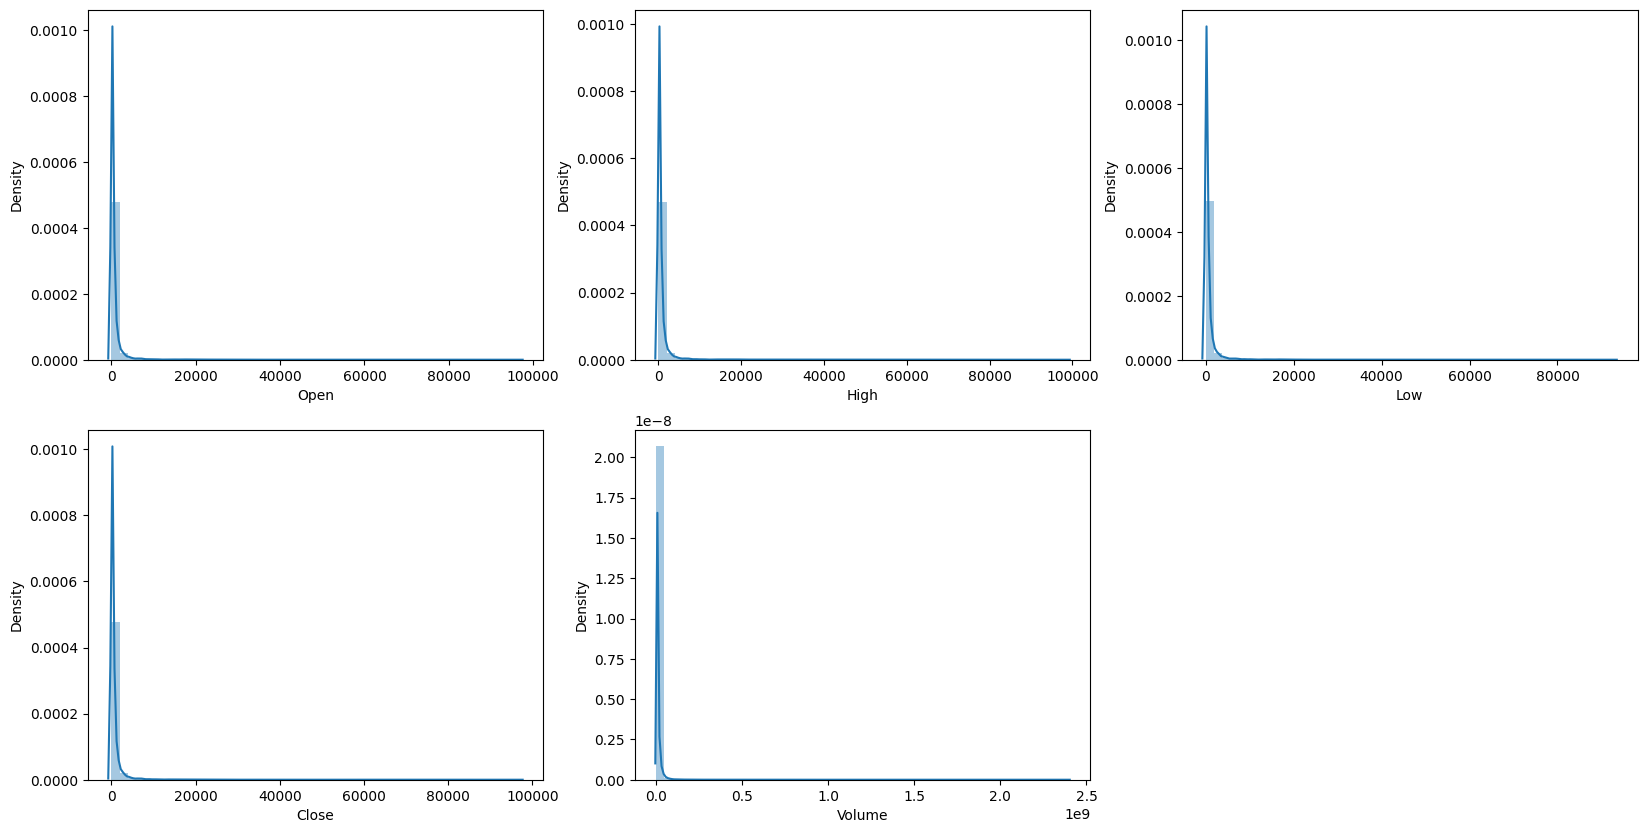

In [9]:

import matplotlib.pyplot as plt
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()


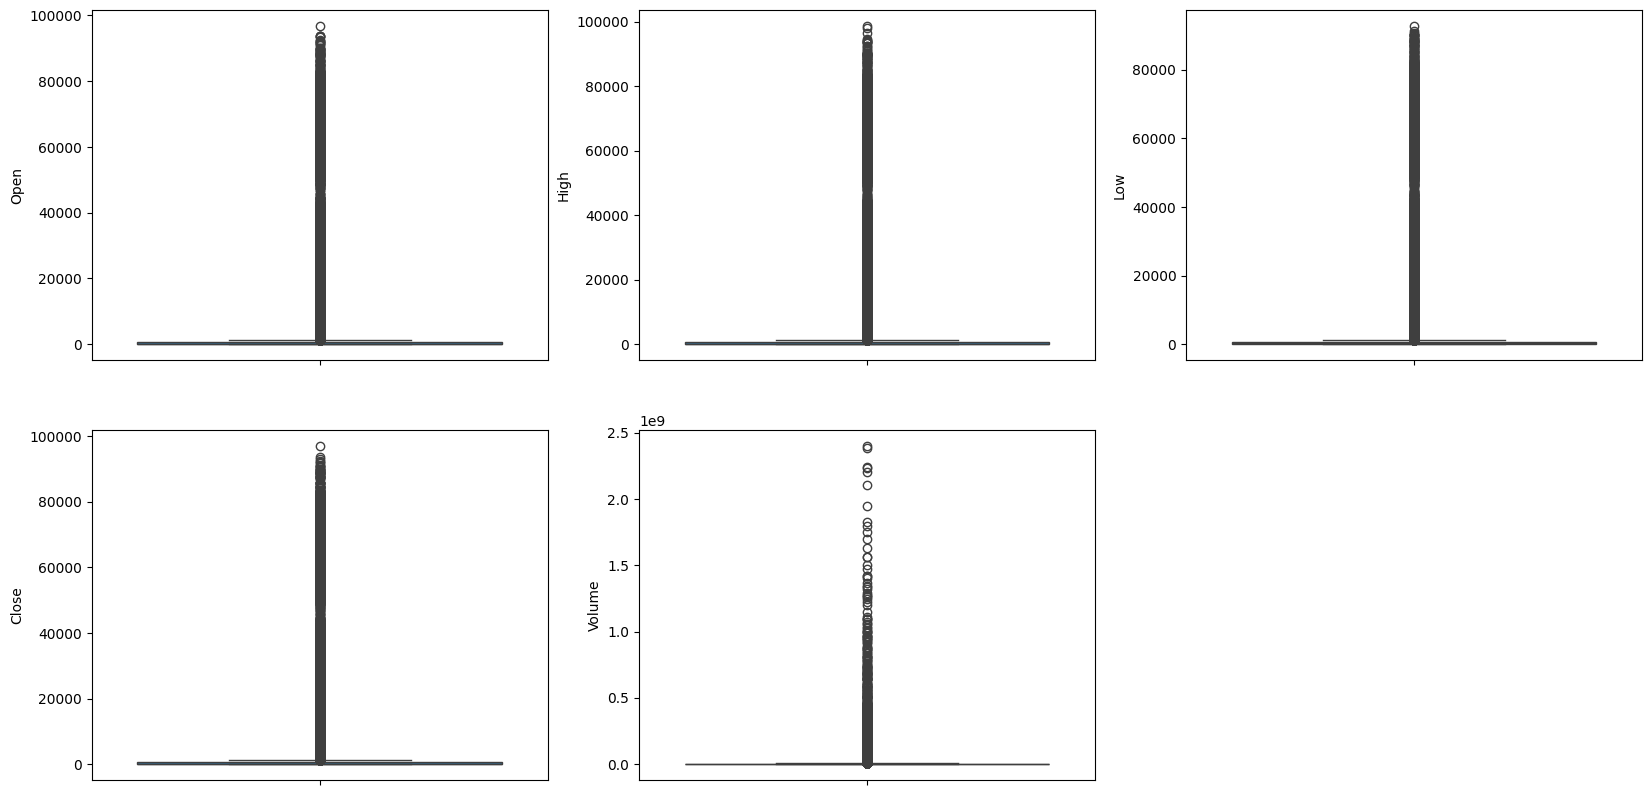

In [10]:

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()


In [11]:
# prompt: Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

import numpy as np
df['Open-Close'] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']
df = df.dropna()
X = df[['Open-Close', 'High-Low']]
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [12]:
splitted = df['Date'].str.split('-', expand=True) # Split by '-' if your dates are in format "MM-DD-YYYY"

# If your date format is different, adjust the split character accordingly.
# For example, if your date format is "YYYY-MM-DD", use:
# splitted = df['Date'].str.split('-', expand=True)
# df['day'] = splitted[2].astype('int')
# df['month'] = splitted[1].astype('int')
# df['year'] = splitted[0].astype('int')

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,Symbol,Open-Close,High-Low,day,month,year
0,03-01-2000,1.91,1.98,1.91,1.98,40800,AARTIIND,-0.07,0.07,1,3,2000
1,04-01-2000,1.86,1.92,1.84,1.86,105600,AARTIIND,0.00,0.08,1,4,2000
2,05-01-2000,1.80,1.85,1.80,1.80,45600,AARTIIND,0.00,0.05,1,5,2000
3,06-01-2000,1.84,1.88,1.84,1.84,79200,AARTIIND,0.00,0.04,1,6,2000
4,07-01-2000,1.80,1.83,1.76,1.76,31200,AARTIIND,0.04,0.07,1,7,2000


In [13]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,Symbol,Open-Close,High-Low,day,month,year,is_quarter_end
0,03-01-2000,1.91,1.98,1.91,1.98,40800,AARTIIND,-0.07,0.07,1,3,2000,1
1,04-01-2000,1.86,1.92,1.84,1.86,105600,AARTIIND,0.00,0.08,1,4,2000,0
2,05-01-2000,1.80,1.85,1.80,1.80,45600,AARTIIND,0.00,0.05,1,5,2000,0
3,06-01-2000,1.84,1.88,1.84,1.84,79200,AARTIIND,0.00,0.04,1,6,2000,1
4,07-01-2000,1.80,1.83,1.76,1.76,31200,AARTIIND,0.04,0.07,1,7,2000,0


In [14]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


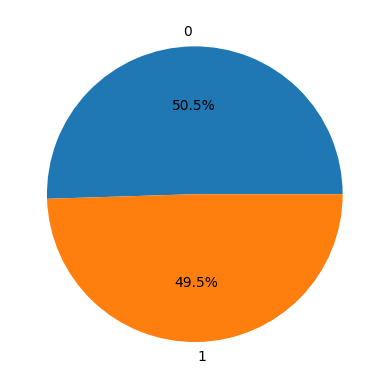

In [15]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


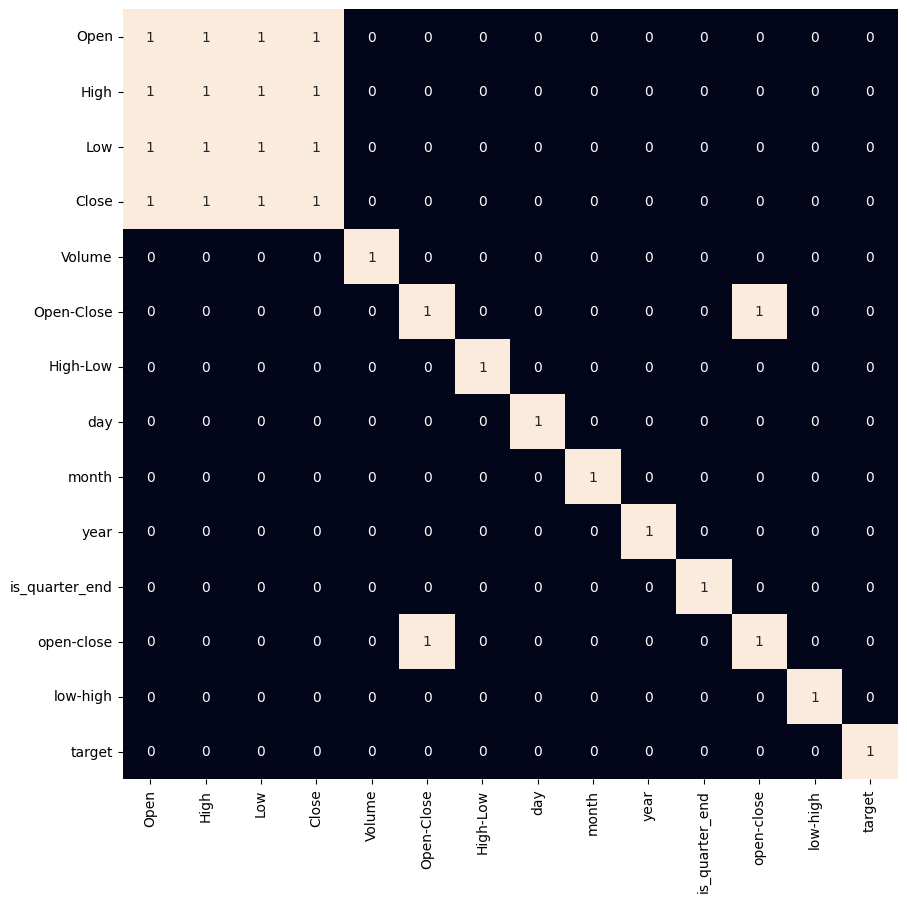

In [16]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Convert 'Date' to datetime object and exclude it from correlation
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Specify the correct format
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sb.heatmap(numeric_df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [17]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(655377, 3) (72820, 3)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

# ... (Your existing code for data loading and preprocessing) ...

models = [
    LogisticRegression(),
    SVC(kernel='rbf', probability=True, C=1.0),
    XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, tree_method='gpu_hist')  # Use GPU
]

for i in range(3):
    models[i].fit(X_train, Y_train)  # Train on the full dataset now

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(
        Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.4996779852387104
Validation Accuracy :  0.5026253812533817



In [ ]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()
